In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [6]:
#function (as a function)
def fx(x):
    return 3*x**2 - 3*x + 4

def deriv(x):
    return 6*x - 3

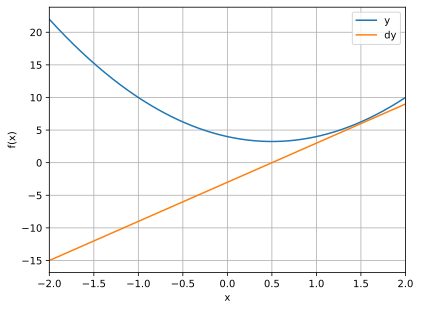

In [7]:
#plt the function and its derivative

#define a range for x
x = np.linspace(-2,2,2001)
plt.plot(x,fx(x),x,deriv(x))
plt.xlim([x[0],x[-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [29]:
#random starting point 
#np.random.seed(44)
localmin = np.random.choice(x,1)

#learning parameters
learning_rate = 0.01
training_epochs = 50

#run through training
modelparamsFixed = np.zeros((training_epochs,3), dtype=float)

for i in range(training_epochs):
    grad = deriv(localmin)
    
    #Fixed learning rate
    lr = learning_rate
    localmin = localmin - grad*learning_rate
    modelparamsFixed[i][0] = localmin
    modelparamsFixed[i][1] = grad
    modelparamsFixed[i][2] = lr



C:\Users\raahu\AppData\Local\Temp\ipykernel_23884\568091014.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsFixed[i][0] = localmin
C:\Users\raahu\AppData\Local\Temp\ipykernel_23884\568091014.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsFixed[i][1] = grad


In [33]:
# random starting point
localmin = np.random.choice(x,1)
initval = localmin[:] # store the initial value

# learning parameters
learning_rate = .01
training_epochs = 50

# run through training and store all the results
modelparamsGrad = np.zeros((training_epochs,3))
for i in range(training_epochs):
  
  # compute gradient
  grad = deriv(localmin)

  # adapt the learning rate according to the gradient
  lr = learning_rate*np.abs(grad)

  # update parameter according to g.d.
  localmin = localmin - lr*grad

  # store the parameters
  modelparamsGrad[i,0] = localmin
  modelparamsGrad[i,1] = grad
  modelparamsGrad[i,2] = lr

C:\Users\raahu\AppData\Local\Temp\ipykernel_23884\113732522.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,0] = localmin
C:\Users\raahu\AppData\Local\Temp\ipykernel_23884\113732522.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,1] = grad
C:\Users\raahu\AppData\Local\Temp\ipykernel_23884\113732522.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,2] = lr


In [31]:
#random starting point 
np.random.seed(44)
localmin = np.random.choice(x,1)

#learning parameters
learning_rate = 0.01
training_epochs = 50

#run through training
modelparamsTime = np.zeros((training_epochs,3), dtype=float)

for i in range(training_epochs):

    grad = deriv(localmin)

    #time based learning rate
    lr = learning_rate*(1- (1+i)/training_epochs)

    localmin = localmin - grad*learning_rate
    modelparamsTime[i][0] = localmin
    modelparamsTime[i][1] = grad
    modelparamsTime[i][2] = lr



C:\Users\raahu\AppData\Local\Temp\ipykernel_23884\2353461922.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsTime[i][0] = localmin
C:\Users\raahu\AppData\Local\Temp\ipykernel_23884\2353461922.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsTime[i][1] = grad


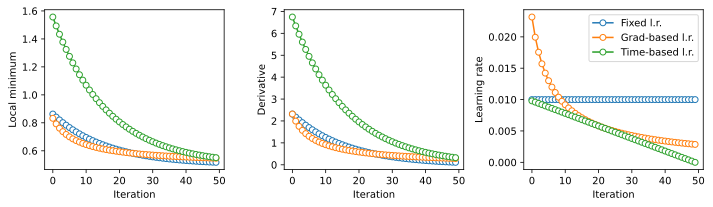

In [34]:
fig,ax = plt.subplots(1,3,figsize=(10,3))

# generate the plots
for i in range(3):
  ax[i].plot(modelparamsFixed[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsGrad[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsTime[:,i],'o-',markerfacecolor='w')
  ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning rate')
ax[2].legend(['Fixed l.r.','Grad-based l.r.','Time-based l.r.'])

plt.tight_layout()
plt.show()